In [78]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import csv
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# File to Load 
wine_data = "Resources/Wine_Bottled_2019.csv"
per_capita = "Resources/per_capita_consumption_states_1977_2018_clean.csv"
population = "Resources/CDCPopulationGender.csv"

# Read Wine Production File and store into Pandas data frame
wine_data = pd.read_csv(wine_data)
wine_df = wine_data
wine_df.dtypes

State                               object
# of Bottled Still Wines             int64
# of Bottled Effervescence Wines     int64
Month                               object
Year                                 int64
dtype: object

In [79]:
# of Bottled Still Wines by state
bottled_wine = wine_df.copy()
bottled_wine.columns = ['State', 'Bottled_Still', 'Bottled_Effervescence', 'Month', 'Year']
bottled_wine = bottled_wine.drop(['Year', 'Month'], axis=1)
bottled_wine

,State,Bottled_Still,Bottled_Effervescence
0,Alabama,30153,200
1,Alaska,5247,0
2,Arizona,80784,2059
3,Arkansas,24197,0
4,California,39007466,1110404
...,...,...,...
540,Wisconsin,353647,496
541,Wisconsin,156990,0
542,Wisconsin,132404,1063
543,Wisconsin,257117,483


In [80]:
#state_group = effervescence_wine.groupby("State")
state_group = bottled_wine.groupby(by=["State"]).sum()
#state_group.replace(District of Columbia, District Of Columbia)
#state_group.replace({'State': District of Columbia}, District Of Columbia)
state_group

,Bottled_Still,Bottled_Effervescence
State,,
Alabama,31265,200
Alaska,67714,7150
Arizona,174253,8849
Arkansas,242417,2737
California,463885220,20090343
Colorado,749825,4598
Connecticut,181724,4444
Delaware,23503,0
District Of Columbia,69487,0


In [81]:
# Read Per Capita Consumption File and store into Pandas data frame
consumption_data = pd.read_csv(per_capita)
consumption_df = consumption_data
consumption_df['state'] = consumption_df['state'].str.title()
year_filter = consumption_df['year']==2018
year_filter_df = consumption_df[year_filter]
year_filter_df.dtypes

state                                     object
year                                       int64
ethanol_beer_gallons_per_capita          float64
ethanol_wine_gallons_per_capita          float64
ethanol_spirit_gallons_per_capita        float64
ethanol_all_drinks_gallons_per_capita    float64
number_of_beers                          float64
number_of_glasses_wine                   float64
number_of_shots_liquor                   float64
number_of_drinks_total                   float64
dtype: object

In [82]:
#consumption_df['year'] = pd.to_datetime(consumption_df['year'].astype(str), format='%Y')
consumption_df['year'] = pd.to_datetime(consumption_df['year'], format='%Y')
consumption_df.dtypes

state                                            object
year                                     datetime64[ns]
ethanol_beer_gallons_per_capita                 float64
ethanol_wine_gallons_per_capita                 float64
ethanol_spirit_gallons_per_capita               float64
ethanol_all_drinks_gallons_per_capita           float64
number_of_beers                                 float64
number_of_glasses_wine                          float64
number_of_shots_liquor                          float64
number_of_drinks_total                          float64
dtype: object

In [83]:
#Per Capita Grouping
consumption_group = consumption_df.groupby(by=["state"]).sum()
consumption_group.head(51)

,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
state,,,,,,,,
Alabama,46.63,8.13,25.77,80.50,11053.037037,1613.395349,5350.462287,17173.333333
Alaska,57.54,19.71,50.73,128.04,13639.111111,3911.441860,10532.749392,27315.200000
Arizona,60.87,15.67,34.34,110.88,14428.444444,3109.705426,7129.797242,23654.400000
Arkansas,43.59,6.06,24.60,74.33,10332.444444,1202.604651,5107.542579,15857.066666
California,48.70,24.64,34.55,107.88,11543.703704,4889.798449,7173.398216,23014.400000
Colorado,56.91,18.12,42.52,117.57,13489.777778,3595.906977,8828.158962,25081.600000
Connecticut,40.87,21.38,39.37,101.62,9687.703704,4242.852713,8174.144363,21678.933333
Delaware,57.77,20.59,53.48,131.77,13693.629630,4086.077519,11103.714518,28110.933333
District Of Columbia,57.09,38.34,79.98,175.44,13532.444444,7608.558140,16605.742093,37427.200001


In [84]:
merge = state_group.merge(year_filter_df, left_on='State', right_on='state')
merge['Bottled_Year']='2019'
merge = merge.drop(
    ['ethanol_beer_gallons_per_capita','ethanol_spirit_gallons_per_capita',
     'ethanol_all_drinks_gallons_per_capita','number_of_beers', 'number_of_shots_liquor','number_of_drinks_total']
    , axis=1)
merge

,Bottled_Still,Bottled_Effervescence,state,year,ethanol_wine_gallons_per_capita,number_of_glasses_wine,Bottled_Year
0,31265,200,Alabama,2018,0.26,51.596899,2019
1,67714,7150,Alaska,2018,0.53,105.178295,2019
2,174253,8849,Arizona,2018,0.39,77.395349,2019
3,242417,2737,Arkansas,2018,0.23,45.643411,2019
4,463885220,20090343,California,2018,0.62,123.038760,2019
5,749825,4598,Colorado,2018,0.52,103.193798,2019
6,181724,4444,Connecticut,2018,0.60,119.069767,2019
7,23503,0,Delaware,2018,0.72,142.883721,2019
8,69487,0,District Of Columbia,2018,1.02,202.418605,2019
9,3140814,5970,Florida,2018,0.52,103.193798,2019


In [85]:
merge_group = merge.groupby(by=["state"]).min()
merge_group['Bottled_Year']='2019'
merge_group['Total # of Bottled of Wine']= merge_group['Bottled_Still'] + merge_group['Bottled_Effervescence']
merge_group

,Bottled_Still,Bottled_Effervescence,year,ethanol_wine_gallons_per_capita,number_of_glasses_wine,Bottled_Year,Total # of Bottled of Wine
state,,,,,,,
Alabama,31265,200,2018,0.26,51.596899,2019,31465
Alaska,67714,7150,2018,0.53,105.178295,2019,74864
Arizona,174253,8849,2018,0.39,77.395349,2019,183102
Arkansas,242417,2737,2018,0.23,45.643411,2019,245154
California,463885220,20090343,2018,0.62,123.038760,2019,483975563
Colorado,749825,4598,2018,0.52,103.193798,2019,754423
Connecticut,181724,4444,2018,0.60,119.069767,2019,186168
Delaware,23503,0,2018,0.72,142.883721,2019,23503
District Of Columbia,69487,0,2018,1.02,202.418605,2019,69487


In [86]:
cor_gallons = merge_group.copy()
cor_gallons = merge_group.drop(
   ['year','Bottled_Year'], axis=1)
cor_gallons.columns = ['Bottled_Still','Bottled_Effervescence', 'Gallons', 'Glasses','Total # of Bottled of Wine']
cor_gallons = cor_gallons.convert_dtypes()
cor_gallons = cor_gallons.drop(['California'])
cor_gallons

,Bottled_Still,Bottled_Effervescence,Gallons,Glasses,Total # of Bottled of Wine
state,,,,,
Alabama,31265,200,0.26,51.596899,31465
Alaska,67714,7150,0.53,105.178295,74864
Arizona,174253,8849,0.39,77.395349,183102
Arkansas,242417,2737,0.23,45.643411,245154
Colorado,749825,4598,0.52,103.193798,754423
Connecticut,181724,4444,0.60,119.069767,186168
Delaware,23503,0,0.72,142.883721,23503
District Of Columbia,69487,0,1.02,202.418605,69487
Florida,3140814,5970,0.52,103.193798,3146784


<Figure size 720x576 with 0 Axes>

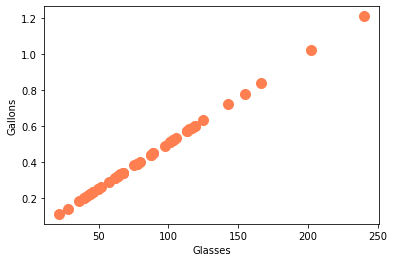

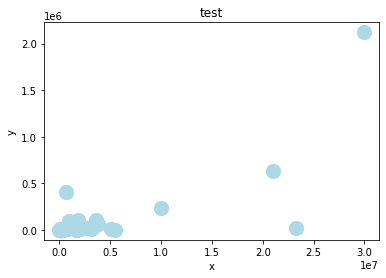

In [87]:
plt.figure(figsize=((10,8)))
ax = cor_gallons.plot.scatter(x='Glasses',
                      y='Gallons',s=100,
                      c='coral')
ax = cor_gallons.plot.scatter(x='Bottled_Still',
                      y='Bottled_Effervescence',s=200,
                      c='lightblue')
plt.title('test')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('ScatterPlot_08.png')
plt.show()

True


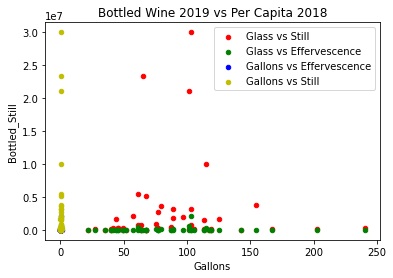

In [89]:
ax1 = cor_gallons.plot(kind='scatter', x='Glasses', y='Bottled_Still', color='r', label='Glass vs Still', title= 'Bottled Wine 2019 vs Per Capita 2018')    
ax2 = cor_gallons.plot(kind='scatter', x='Glasses', y='Bottled_Effervescence', color='g', ax=ax1, label='Glass vs Effervescence')    
ax3 = cor_gallons.plot(kind='scatter', x='Gallons', y='Bottled_Effervescence', color='b', ax=ax1, label = 'Gallons vs Effervescence')
ax4 = cor_gallons.plot(kind='scatter', x='Gallons', y='Bottled_Still', color='y', ax=ax2, label = 'Gallons vs Still')
plt.legend(loc='best')
plt.savefig('Bottled Wine 2019 vs Per Capita 2018.png')

print(ax1 == ax2 == ax3 == ax4)

In [43]:
X = pd.DataFrame(cor_gallons['Glasses'])
y = pd.DataFrame(cor_gallons['Bottled_Still'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=False, random_state=None)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[-19.975221019052388, 0.0030300241546282747, -0.18021259545866597]


In [64]:
glass = cor_gallons['Glasses']
gallon = cor_gallons['Gallons']
still =  cor_gallons['Bottled_Still']
efferv = cor_gallons['Bottled_Effervescence']

#pearsonr_coefficient, p_value = pearsonr(glass,still)
pearsonr_coefficient, p_value = pearsonr(glass, still)
#print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)

#pearsonr_coefficient = stats.pearsonr(glass, still)

print(pearsonr_coefficient)

NameError: name 'pearsonr' is not defined

In [ ]:
cor_gallons = merge_group.copy()
cor_gallons = merge_group.drop(
    ['Bottled_Effervescence','Bottled_Still',
     'year','Bottled_Year','ethanol_wine_gallons_per_capita'], axis=1)
cor_gallons.columns = ['Glasses Consumed Per Capita', 'Bottled_Still']
cor_gallon_x = cor_gallons.convert_dtypes()
cor_gallons_x

In [ ]:
ax1.set_ylim(100000,500000)
ax1 = cor_gallons.plot.scatter(x='Glasses Consumed Per Capita',
                      y='Total # of Bottled of Wine',
                      c='DarkBlue')